<a href="https://colab.research.google.com/github/debbytech22/Portfolio_project/blob/master/Customer_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![image](Customer_Churn_rate_image.png)
                                            
                                                  












# TABLE OF CONTENT
 - [INTRODUCTION](#INTRODUCTION)
 - [DATA CLEANING](#DATA-CLEANING)
 - [EXPLORATORY DATA ANALYSIS](#EXPLORATORY-DATA-ANALYSIS)
 - [FEATURE SELECTION](#FEATURE-SELECTION)
 - [DATA PREPROCESSING](#DATA-PREPROCESSING)
 - [DATA MODELLING](#DATA-MODELLING)
 - [CONCLUSION](#CONCLUSION)

## INTRODUCTION

AIM: The model was built to help a bank predict customers who are likely to churn so that they can proactively provide them better services and turn customers' decisions in the opposite direction.

OBJECTIVES: Given a dataset about a customer, we want to predict which customer will churn.

 Data source: [click to access dataset](https://www.kaggle.com/datasets/sakshigoyal7/credit-card-customers)

 ## columns definition:
 CLIENTNUM Client number. Unique identifier for the customer holding the account

Attrition_Flag Internal event (customer activity) variable - if the account is closed then 1 else 0

Customer_Age Demographic variable - Customer's Age in Years

Gender Demographic variable - M=Male, F=Female

Dependent_count Demographic variable - Number of dependents

Education_Level Demographic variable

Marital_Status Demographic variable

Income_Category Demographic variable - Annual Income Category of the account holder

Card_Category Product Variable - Type of Card

Months_on_book Period of relationship with bank

Total_Relationship_Count Total no. of products held by the customer

Months_Inactive_12_mon No. of months inactive in the last 12 months

Contacts_Count_12_mon No. of Contacts in the last 12 months

Credit_Limit Credit Limit on the Credit Card

Total_Revolving_Bal Total Revolving Balance on the Credit Card

Total_Trans_Amt Total Transaction Amount (Last 12 months)

Total_Trans_Ct Total Transaction Count (Last 12 months)

Avg_Utilization_Ratio Average Card Utilization Ratio



In [ ]:
# import the necessary libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
#load the dataset into jupyter notebok
data = pd.read_csv("BankChurners.csv")
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [ ]:
# this two columns are not useful for our analysis and modelling, so they are dropped
data.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1'],axis= 1,inplace=True)

In [ ]:
data.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


## DATA CLEANING

In [ ]:
# non of the columns has a null value
data.isnull().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [ ]:
# Income_Category columns has some anomalies that has to be removed in order for the column to be ready for analysis
data['Income_Category'].value_counts()

Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64

In [ ]:
# this function will remove the k,$ and + sign in the income category column
def clean_col(x):
        if 'K' in x:
            return x.replace('K','').replace('$','')
        elif '+' in x:
            return x.replace('+','')
        elif x =='Less than 40':
            return x.split()[2]
        return x

In [ ]:
# the clean_col function is used to clean the income category column
data['Income_Category']=data['Income_Category'].apply(clean_col)
data['Income_Category'].value_counts()

40          3561
40 - 60     1790
80 - 120    1535
60 - 80     1402
Unknown     1112
120          727
Name: Income_Category, dtype: int64

In [ ]:
# this function will remove the _ sign in the income category column,
# and find an average value that can represent each category
def aver_value(x):
    if '-' in x:
        splitted_values=x.split('-')
        first_value= int(splitted_values[0])
        second_value = int(splitted_values[1])
        average = (first_value + second_value)/2
        return average
    else:
        return x

In [ ]:
# the aver_value function is used to find the average value in the income category column
data['Income_Category']=data['Income_Category'].apply(aver_value)
data['Income_Category'].value_counts()

40         3561
50.0       1790
100.0      1535
70.0       1402
Unknown    1112
120         727
Name: Income_Category, dtype: int64

In [ ]:
# we changed the income column to a numeric type
data['Income_Category']=pd.to_numeric(data['Income_Category'],errors='coerce')
data['Income_Category'].value_counts(dropna=False)

40.0     3561
50.0     1790
100.0    1535
70.0     1402
NaN      1112
120.0     727
Name: Income_Category, dtype: int64

In [ ]:
data['Income_Category'].dtype

dtype('float64')

## EXPLORATORY DATA ANALYSIS

C:\Users\Mrs Arowolo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Count of Attritted Versus Existing Customers')

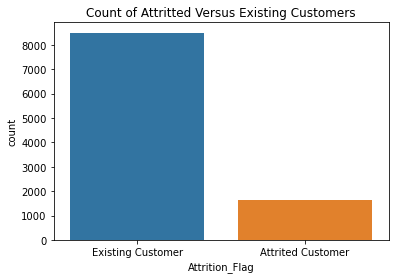

In [ ]:
sns.countplot(data['Attrition_Flag'])
plt.title('Count of Attritted Versus Existing Customers')

From the countplot visuals above, it is obvious that the Attrition_Flag column as an imbalanced category, we have a larger number of existing customer compared to attrited customers. We shall check the percentage of the unique values in the column

In [ ]:
#we can see that only 16% of the customers attrited while about 84% of customers are retained.
# This imbalance in the target variable category will affect the machine learning model and we will need to balance it using SMOTE
data['Attrition_Flag'].value_counts(normalize= True, dropna = False)*100

Existing Customer    83.934038
Attrited Customer    16.065962
Name: Attrition_Flag, dtype: float64

In [ ]:
# In order to check the correlation between our target variable and other variables,
#we are going to encode the Attrition_Flag column

from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data['Attrition_Flag']=label_encoder.fit_transform(data['Attrition_Flag'])

In [ ]:
data['Attrition_Flag'].value_counts()

1    8500
0    1627
Name: Attrition_Flag, dtype: int64

array([[<AxesSubplot:title={'center':'CLIENTNUM'}>,
        <AxesSubplot:title={'center':'Attrition_Flag'}>,
        <AxesSubplot:title={'center':'Customer_Age'}>,
        <AxesSubplot:title={'center':'Dependent_count'}>],
       [<AxesSubplot:title={'center':'Income_Category'}>,
        <AxesSubplot:title={'center':'Months_on_book'}>,
        <AxesSubplot:title={'center':'Total_Relationship_Count'}>,
        <AxesSubplot:title={'center':'Months_Inactive_12_mon'}>],
       [<AxesSubplot:title={'center':'Contacts_Count_12_mon'}>,
        <AxesSubplot:title={'center':'Credit_Limit'}>,
        <AxesSubplot:title={'center':'Total_Revolving_Bal'}>,
        <AxesSubplot:title={'center':'Avg_Open_To_Buy'}>],
       [<AxesSubplot:title={'center':'Total_Amt_Chng_Q4_Q1'}>,
        <AxesSubplot:title={'center':'Total_Trans_Amt'}>,
        <AxesSubplot:title={'center':'Total_Trans_Ct'}>,
        <AxesSubplot:title={'center':'Total_Ct_Chng_Q4_Q1'}>],
       [<AxesSubplot:title={'center':'Avg_Utiliz

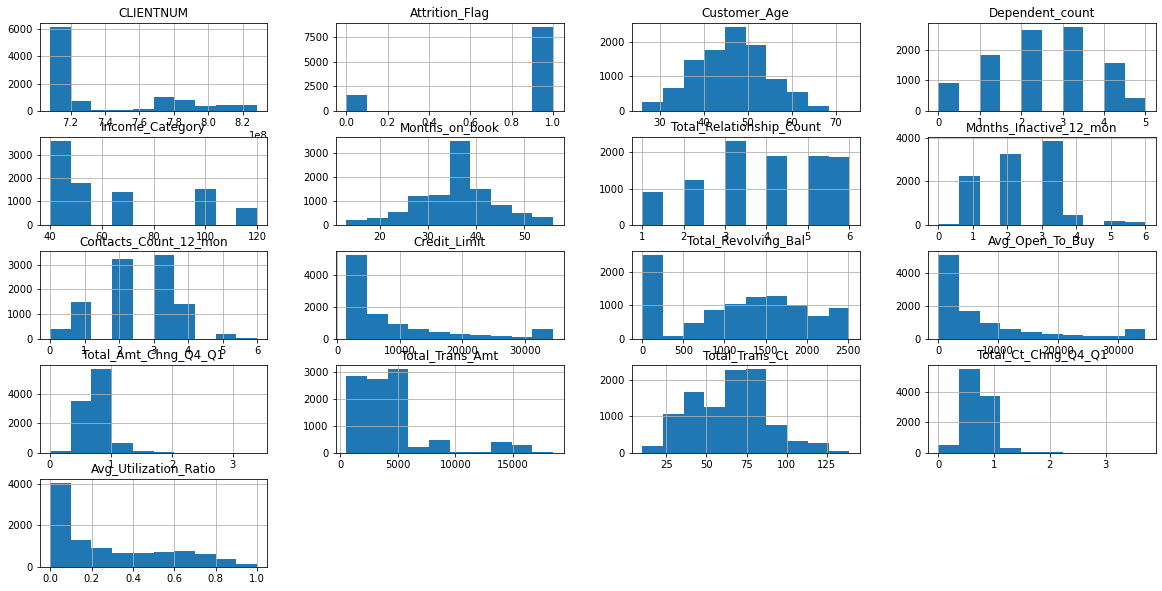

In [ ]:
# we need to visualise the distribution of the numeric columns in order to check for skewness
data.hist(figsize=[20,10])

As seen on the visual, the following columns have a normal distribution: customer age,month on book,dependent count etc.

Some of columns like total revolving balance, month inactive are not so normally distributed but they are not skewed.

Columns like credit_limit, avg utilization ratio, average open to buy etc are skewed

Text(0.5, 1.0, 'Distribution of Credit_Limit and Avg_Open_To_Buy Columns')

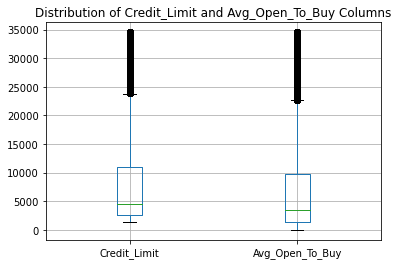

In [ ]:
#plt.figure(figsize=[10,15])
data.boxplot(column=['Credit_Limit','Avg_Open_To_Buy'])
plt.title('Distribution of Credit_Limit and Avg_Open_To_Buy Columns')

<AxesSubplot:>

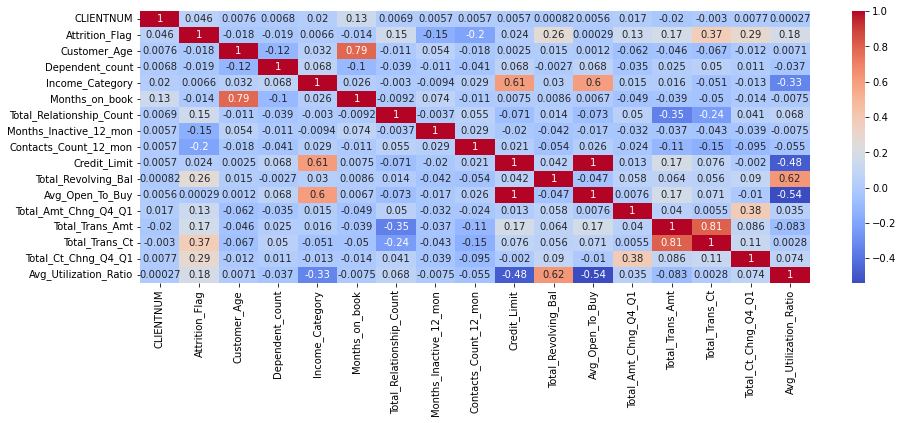

In [ ]:
plt.figure(figsize=[15,5])
sns.heatmap(data.corr(),annot=True, cmap = "coolwarm")

The heatmap above shows that columns like total revolving balance,total transaction amount,total transaction cost,total cost change,average utilization ratio all have correlation with the target label even though it is weak.

## FEATURE SELECTION

###  As seen in the heatmap, certain columns exhibit strong correlation between each other, indicating multicollinearity. To avoid this issue, it is advisable not to use two columns that are highly correlated in the machine learning model. Some of these correlated columns include
-  credit limit and average open to buy
-  credit limit and income category
-  average open to buy and income category
-  average utilization ratio and total revolving balance
-  total transfer amount and total transfer cost
-  customer age and months on book
### As such, we shall be chosing one from each correlated columns  for preprocessing.

## DATA PREPROCESSING

In [ ]:
model_columns=['Customer_Age','Credit_Limit','Total_Revolving_Bal','Total_Trans_Amt','Total_Ct_Chng_Q4_Q1','Total_Relationship_Count']

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data[model_columns]=scaler.fit_transform(data[model_columns])
data[model_columns]

,Customer_Age,Credit_Limit,Total_Revolving_Bal,Total_Trans_Amt,Total_Ct_Chng_Q4_Q1,Total_Relationship_Count
0,-0.165406,0.446622,-0.473422,-0.959707,3.834003,0.763943
1,0.333570,-0.041367,-0.366667,-0.916433,12.608573,1.407306
2,0.583058,-0.573698,-1.426858,-0.740982,6.807864,0.120579
3,-0.789126,-0.585251,1.661686,-0.951758,6.807864,-0.522785
4,-0.789126,-0.430877,-1.426858,-1.056263,7.509325,0.763943
...,...,...,...,...,...,...
10122,0.458314,-0.509330,0.844455,3.259358,0.608119,-0.522785
10123,-0.664382,-0.479181,1.255524,1.283475,-0.122745,0.120579
10124,-0.290150,-0.354626,-1.426858,1.732994,0.444305,0.763943
10125,-2.036565,-0.368710,-1.426858,1.174848,0.041070,0.120579


## DATA MODELLING

In [ ]:
# importing the neccessary libraries
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score


In [ ]:
# Seperate the input variables and the target variable
y=data['Attrition_Flag']# target variable
X= data[model_columns]# input variables

In [ ]:
# split the dataset into train and test
X_train, X_test , Y_train, Y_test = train_test_split(X,y,test_size= 0.2 ,random_state=42)

In [ ]:
# the target variable has imbalanced categories has shown on the countplot,
# we shall apply SMOTE to balance up the two categories to avoid bias
smote = SMOTE(sampling_strategy='auto',random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, Y_train)

In [ ]:
# fit the X_train and Y_train with the algorithm
model = LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression()

In [ ]:
# we checked how well the model fits the training data
model.score(X_train, Y_train)

0.8840883841501049

In [ ]:
# the model make prediction with the x test
predictions = model.predict(X_test)
predictions

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
# Calculate the accuracy score
accuracy = accuracy_score(Y_test, predictions)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8820335636722606


In [ ]:
# Calculate the f1_score
f1 = f1_score(Y_test, predictions)
print(f"F1 score: {f1}")

F1 score: 0.9332961205693553


## CONCLUSION

### we built a very great classification model using LogisticRegression algorithm , it did absolutely well in training with a score of 0.88 and did well in testing as well with a score of 0.93.